<a href="https://colab.research.google.com/github/antunkerner/Spoon-Knife/blob/master/AI-Academy01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds



In [ ]:
assert tf.__version__.startswith('2.')


In [ ]:
# Load the Iris dataset with defined splits for training and testing
(ds_train, ds_test), ds_info = tfds.load(
    'iris',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True, # Load the dataset as (feature, label) pairs
    with_info=True # Retrieve the metadata of the dataset
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/150 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/iris/incomplete.0ZMGJG_2.1.0/iris-train.tfrecord*...:   0%|          | 0/1…

Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.1.0. Subsequent calls will reuse this data.


In [ ]:
# Function to preprocess the dataset by one-hot encoding the labels
def preprocess(features, label):
    label = tf.one_hot(label, depth=3) # 3 classes in the Iris dataset
    return features, label


In [ ]:
# Prepare the train and test datasets
train_data = ds_train.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_data = ds_test.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)


In [ ]:
# Define a simple neural network for classification
model = tf.keras.Sequential([
tf.keras.layers.Dense(128, activation='relu', input_shape=(4,)), # Input shape is 4 for the four Iris features
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax') # Softmax for multiclass classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model on the training data and validate on the test data
history = model.fit(train_data, epochs=50, validation_data=test_data)
# Evaluate the model's performance on the test dataset
loss, accuracy = model.evaluate(test_data)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")
# Use the model to make predictions on a new sample
sample_data = tf.constant([[5.1, 3.3, 1.7, 0.5]]) # Example measurements of an iris flower
# Make the predictions
predictions = model.predict(sample_data)
predicted_class = tf.argmax(predictions, axis=1).numpy()
print(f"Predicted class: {predicted_class}")

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9881 - loss: 0.0317 - val_accuracy: 0.9000 - val_loss: 0.2980
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9912 - loss: 0.0261 - val_accuracy: 0.9333 - val_loss: 0.1908
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9967 - loss: 0.0230 - val_accuracy: 0.9333 - val_loss: 0.1631
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9967 - loss: 0.0193 - val_accuracy: 0.9333 - val_loss: 0.2422
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9967 - loss: 0.0189 - val_accuracy: 0.9333 - val_loss: 0.2002
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9967 - loss: 0.0184 - val_accuracy: 0.9333 - val_loss: 0.1742
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9967 - loss: 0.0181 - val_accuracy: 0.9333 - val_loss: 0.2147
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9967 - loss: 0.0171 - val_accuracy: 0.9333 - val_loss: 0.2060
Epo

In [ ]:
# Explore the dataset
for features, label in ds_train.take(1): # Adjust this part based on whether ds_train is batched
    print("Features:", features.numpy()) # This will print the features of one batch or one example
    print("Label:", label.numpy()) # This will print the labels of one batch or one example

Features: [5.1 3.4 1.5 0.2]
Label: 0


In [ ]:
def normalize_data(features, label):
    """Normalize the features based on dataset statistics.
    Assumes features are in the format [sepal length, sepal width, petal length, petal width].
    """
    # Define mean and standard deviation for the Iris dataset features
    mean = tf.constant([5.84, 3.05, 3.76, 1.20], dtype=tf.float32)
    std = tf.constant([0.83, 0.43, 1.76, 0.76], dtype=tf.float32)
    # Normalize features
    features = (features - mean) / std
    return features, label
# Specify batch size for training and testing
batch_size = 32
# Assuming ds_train and ds_test are previously defined TensorFlow Datase objects
# Apply normalization, shuffle training data, and batch both datasets
ds_train = ds_train.map(normalize_data).shuffle(1000).batch(batch_size)
ds_test = ds_test.map(normalize_data).batch(batch_size)


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
# Load dataset
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target.reshape(-1, 1), random_state=42)
# One hot encode target values
#enc = OneHotEncoder(handle_unknown='ignore')
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Set sparse_output to False
y_train_onehot = enc.fit_transform(y_train)
y_test_onehot = enc.transform(y_test)
# Build a simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_onehot, epochs=10, validation_data=(X_test, y_test_onehot))

# Save the model
model.save("my_model.keras")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.2092 - loss: 1.6566 - val_accuracy: 0.1579 - val_loss: 1.7483
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1192 - loss: 1.5038 - val_accuracy: 0.1316 - val_loss: 1.6750
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1490 - loss: 1.5056 - val_accuracy: 0.0789 - val_loss: 1.6014
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1018 - loss: 1.4360 - val_accuracy: 0.0789 - val_loss: 1.5301
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1213 - loss: 1.3662 - val_accuracy: 0.1579 - val_loss: 1.4620
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1897 - loss: 1.2639 - val_accuracy: 0.2105 - val_loss: 1.3963
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2289 - loss: 1.2708 - val_accuracy: 0.2105 - val_loss: 1.3339
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2763 - loss: 1.2092 - val_accuracy: 0.2105 - val_loss: 1.2753
Epoch 9/10

In [ ]:
!saved_model_cli show --dir=my_model.keras --all

2024-09-24 12:07:42.275648: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 12:07:42.303577: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 12:07:42.311815: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 12:07:44.050563: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/saved_model_cli", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/tools/saved_model_cli.py", line 1340, in main
    app.run(

In [ ]:
!tensorboard --logdir=/tmp/iris_model --load_fast=false --bind_all

2024-09-24 12:39:07.588999: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 12:39:07.612895: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 12:39:07.619911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 12:39:09.080194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
TensorBoard 2.17.0 at http://452678c86af0:6006/ (Press CTRL+C to quit)


In [ ]:
import tensorflow as tf

# Define feature columns
#feature_columns = [
#    tf.feature_column.numeric_column('feature1'),
#    tf.feature_column.numeric_column('feature2')
#]

NUM_CLASSES = 3  # Define NUM_CLASSES

# Define the input layer using the Keras functional API
# Create an input layer for each feature
input_feature1 = tf.keras.Input(shape=(1,), name='feature1')
input_feature2 = tf.keras.Input(shape=(1,), name='feature2')

# Concatenate the input features
inputs = tf.keras.layers.concatenate([input_feature1, input_feature2])

# Define the linear classifier using Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax', input_shape=(2,))  # Output layer with softmax activation, taking concatenated features
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Now you can use 'model' for training and prediction
# ...

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf
import numpy as np

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Reshape the data to have a single channel
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the input layer using the Keras functional API
input_layer = tf.keras.Input(shape=(28, 28, 1))

# Define the model architecture (CNN)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Make predictions
predictions = model.predict(x_test)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Print the first 10 predictions
print(predicted_classes[:10])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.7670 - loss: 0.6531 - val_accuracy: 0.8640 - val_loss: 0.3803
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 34ms/step - accuracy: 0.8775 - loss: 0.3347 - val_accuracy: 0.8833 - val_loss: 0.3326
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.8932 - loss: 0.2945 - val_accuracy: 0.8881 - val_loss: 0.3196
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9079 - loss: 0.2602 - val_accuracy: 0.8967 - val_loss: 0.2978
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9121 - loss: 0.2405 - val_accuracy: 0.9021 - val_loss: 0.2778
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9198 - loss: 0.2197 - val_accuracy: 0.9017 - val_loss: 0.2715
Epoch 7/10
1875/187

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url, names=column_names)
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
df = iris_data  # Assign iris_data to df
df.sepal_length
df.loc[:,'sepal_length' ]
# df.iloc[:, 3]

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [ ]:
df.iloc[:, 3]

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2
...,...
145,2.3
146,1.9
147,2.0
148,2.3


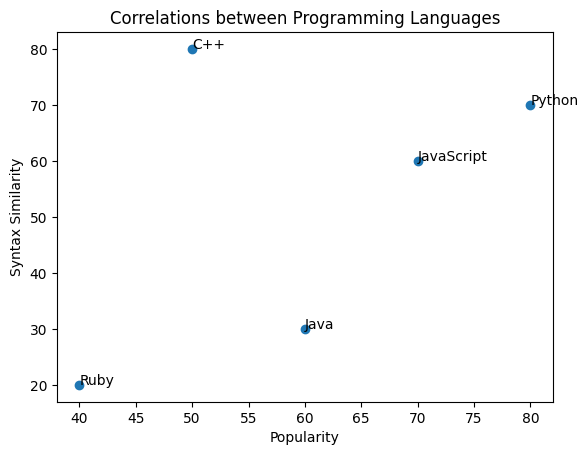

In [1]:
import matplotlib.pyplot as plt

# Sample data for programming languages
languages = ['Python', 'Java', 'C++', 'JavaScript', 'Ruby']
popularity = [80, 60, 50, 70, 40]
syntax_similarity = [70, 30, 80, 60, 20]
# Create a scatter plot
plt.scatter(popularity, syntax_similarity)
# Add labels and title
plt.xlabel('Popularity')
plt.ylabel('Syntax Similarity')
plt.title('Correlations between Programming Languages')
# Add language names as annotations
for i, language in enumerate(languages):
    plt.annotate(language, (popularity[i], syntax_similarity[i]))
# Display the plot
plt.show()


In [2]:
import tensorflow as tf
# Define a tensor
x = tf.constant([1, 2, 3])
# Print the value of the tensor
tf.print(x)


[1 2 3]


In [4]:
import tensorflow as tf
# Define two tensors
x = tf.constant([1, 2, 3])
y = tf.constant([4, 5, 6])
# Print the values of the tensors
tf.print(x, y)
print(x)


[1 2 3] [4 5 6]
tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [10]:
!pip install facets-overview # Install the required package
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import base64
import json
import pandas as pd

def load_dataset(file_path):
    """Loads a dataset and generates feature statistics.

    Args:
        file_path (str): The path to the dataset file.

    Returns:
        facets_overview.proto.feature_statistics_pb2.FeatureNameStatistics:
            The generated feature statistics proto.
    """
    # Load the dataset from JSON file
    with open(file_path, 'r') as f:
        data = json.load(f)

    # Convert data to pandas DataFrame
    df = pd.DataFrame(data)

    gfsg = GenericFeatureStatisticsGenerator()

    # Use ProtoFromDataFrames instead of ProtoFromDataframes
    # ProtoFromDataFrames expects a list of pandas DataFrames
    proto = gfsg.ProtoFromDataFrames([{'name': 'sample_dataset', 'table': df}])

    return proto

dataset = load_dataset('sample_dataset.json') # Make sure to replace with the actual path to your dataset

In [5]:
import json

# Sample data
data = [
  {
    "age": 39,
    "workclass": "State-gov",
    "education": "Bachelors",
    "marital_status": "Never-married",
    "occupation": "Adm-clerical",
    "relationship": "Not-in-family",
    "race": "White",
    "sex": "Male",
    "capital_gain": 2174,
    "capital_loss": 0,
    "hours_per_week": 40,
    "native_country": "United-States",
    "income_bracket": ">50K"
  },
  {
    "age": 50,
    "workclass": "Self-emp-not-inc",
    "education": "Bachelors",
    "marital_status": "Married-civ-spouse",
    "occupation": "Exec-managerial",
    "relationship": "Husband",
    "race": "White",
    "sex": "Male",
    "capital_gain": 0,
    "capital_loss": 0,
    "hours_per_week": 13,
    "native_country": "United-States",
    "income_bracket": "<=50K"
  },
  {
    "age": 55,
    "workclass": "Self-emp-not-inc1",
    "education": "Bachelors",
    "marital_status": "Married-civ-spouse",
    "occupation": "Exec-managerial",
    "relationship": "Husband",
    "race": "White",
    "sex": "Male",
    "capital_gain": 0,
    "capital_loss": 0,
    "hours_per_week": 15,
    "native_country": "United-States",
    "income_bracket": "<=60K"
  }
]
# Save to JSON file
with open("sample_dataset.json", "w") as f:
  json.dump(data, f, indent=2)

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
x = tf.constant(2)
y = tf.constant(3)
z = x + y
print(z)

AttributeError: module 'tensorflow' has no attribute 'enable_eager_execution'

In [4]:
x = tf.constant(2)
y = tf.constant(3)
#z = tf.add(x, y)
#with tf.Session() as sess:
z=y+y
print(z)


tf.Tensor(6, shape=(), dtype=int32)


In [1]:
import torch
# Create a tensor
x = torch.tensor([1, 2, 3])
# Perform a computation
y = x + 2
# Print the result
print(y)

tensor([3, 4, 5])


In [5]:
SELECT
predicted_column,
[predicted_columns…]
FROM
ML.PREDICT(MODEL `project_id.dataset.model`, (
SELECT
input_column,
[input_columns…]
FROM
`project_id.dataset.table`))

SyntaxError: invalid character '…' (U+2026) (<ipython-input-5-379e7b83c9b3>, line 3)

# Novi odjeljak

In [3]:
# Connect to the deep learning VM
!ssh -L 8888:localhost:8888 username@vm-instance-ip
# Execute training code on the VM
!python train.py –data /path/to/large_dataset –model resnet50 –epochs 100


ssh: Could not resolve hostname vm-instance-ip: Name or service not known
python3: can't open file '/content/train.py': [Errno 2] No such file or directory
